<a href="https://colab.research.google.com/github/SSRaylia/Prediction-Using-Machine-Learning/blob/master/Bank_Call_Center_Success_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Call Center Success Rate Prediction

![替代文字](https://aircall.io/blog/wp-content/uploads/2016/11/contact-center-vs.-call-center.png)

### **Data**: The data is a public data set related with direct marketing campaigns (phone calls) of a Euro banking institution. 

### **Goal**: The classification goal is to analyze the features of customers who subscribe a Term Deposit after a sales call and build prediction model for campaign in future.

# **Ingestion**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install ggplot
from ggplot import *

import numpy as np
from scipy import stats

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
call = pd.read_csv("https://raw.githubusercontent.com/SSRaylia/mlproject/master/bigml_5c6c4383eba31d7304000c72.csv")
call.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term deposit?
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Preparation and EDA

## Transform Categorical Data

In [0]:
np.unique(call['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [0]:
for df in [call]:
    df['job_n']=df['job'].map({'admin.':11, 'blue-collar':4, 'entrepreneur':10, 'housemaid':3, 'management':9,'retired':5,'self-employed':7, 'services':6, 'student':2, 'technician':8,'unemployed':1, 'unknown':0})

In [0]:
np.unique(call['marital'])

array(['divorced', 'married', 'single'], dtype=object)

In [0]:
for df in [call]:
    df['marital_n']=df['marital'].map({'divorced':2,'married':3,'single':1})

In [0]:
np.unique(call['education'])

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [0]:
for df in [call]:
    df['education_n']=df['education'].map({'primary':1, 'secondary':2, 'tertiary':3, 'unknown':0})

In [0]:
np.unique(call['default'])

array(['no', 'yes'], dtype=object)

In [0]:
for df in [call]:
    df['default']=df['default'].map({'yes':1,'no':0})

In [0]:
np.unique(call['housing'])

array(['no', 'yes'], dtype=object)

In [0]:
for df in [call]:
    df['housing']=df['housing'].map({'yes':1,'no':0})

In [0]:
np.unique(call['loan'])

array(['no', 'yes'], dtype=object)

In [0]:
for df in [call]:
    df['loan']=df['loan'].map({'yes':1,'no':0})

In [0]:
np.unique(call['contact'])

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [0]:
for df in [call]:
    df['contact_n']=df['contact'].map({'cellular':1, 'telephone':2, 'unknown':0})

In [0]:
np.unique(call['poutcome'])

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [0]:
for df in [call]:
    df['poutcome_n']=df['poutcome'].map({'failure':1, 'other':2, 'success':3, 'unknown':0})

In [0]:
np.unique(call['Term deposit?'])

array(['no', 'yes'], dtype=object)

In [0]:
for df in [call]:
    df['Term Deposit']=df['Term deposit?'].map({'yes':1,'no':0})

In [0]:
np.unique(call['month'])

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [0]:
for df in [call]:
    df['month']=df['month'].map({'apr':4, 'aug':8, 'dec':12, 'feb':2, 'jan':1, 'jul':7, 'jun':6, 'mar':3, 'may':5,'nov':11, 'oct':10, 'sep':9})

## EDA

In [0]:
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


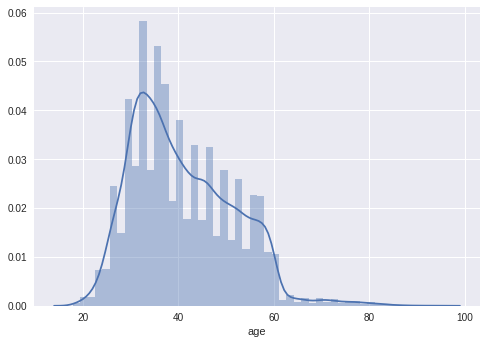

In [0]:
sns.distplot(call['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'successrate')

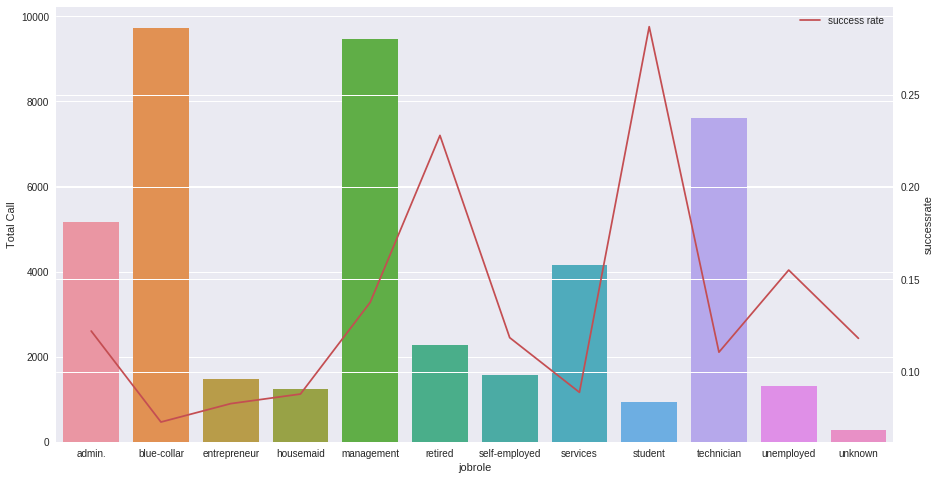

In [0]:
jobgroup = call.groupby('job')['Term Deposit'].sum()/call.groupby('job')['Term Deposit'].count()
jobcount = call.groupby('job')['Term Deposit'].count()

jobgroup = pd.DataFrame({'jobrole':jobgroup.index, 'success rate':jobgroup.values})
jobcount = pd.DataFrame({'jobrole':jobcount.index, 'total':jobcount.values})

jobgroup.set_index(['jobrole'], inplace = True) 
jobcount.set_index(['jobrole'], inplace = True) 

plt.subplots(figsize=(15,8))
ax = sns.barplot(x=jobcount.index, y="total", data=jobcount)
ax.set_ylabel('Total Call')

ax2 = ax.twinx()
jobgroup.plot(ax=ax2,color='r')
ax2.set_ylabel('successrate')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'successrate')

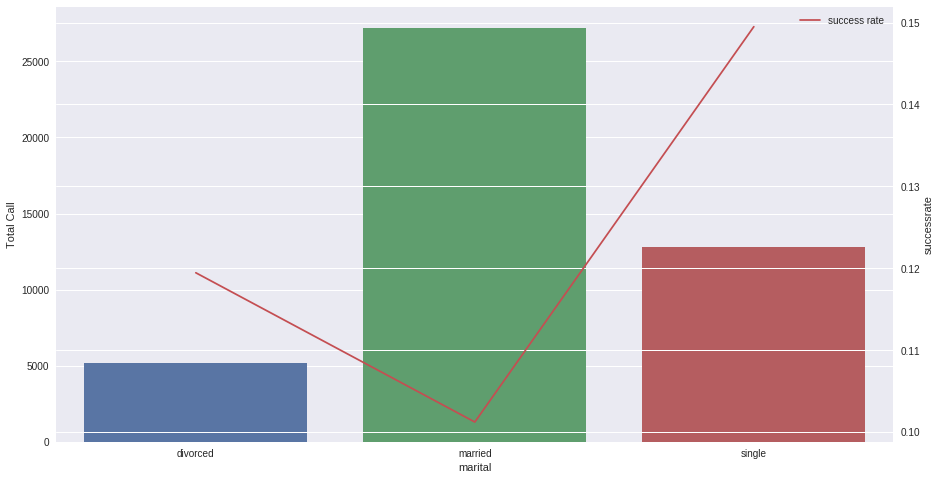

In [0]:
mgroup = call.groupby('marital')['Term Deposit'].sum()/call.groupby('marital')['Term Deposit'].count()
mcount = call.groupby('marital')['Term Deposit'].count()

mgroup = pd.DataFrame({'marital':mgroup.index, 'success rate':mgroup.values})
mcount = pd.DataFrame({'marital':mcount.index, 'total':mcount.values})

mgroup.set_index(['marital'], inplace = True) 
mcount.set_index(['marital'], inplace = True) 

plt.subplots(figsize=(15,8))
ax = sns.barplot(x=mcount.index, y="total", data=mcount)
ax.set_ylabel('Total Call')

ax2 = ax.twinx()
mgroup.plot(ax=ax2,color='r')
ax2.set_ylabel('successrate')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


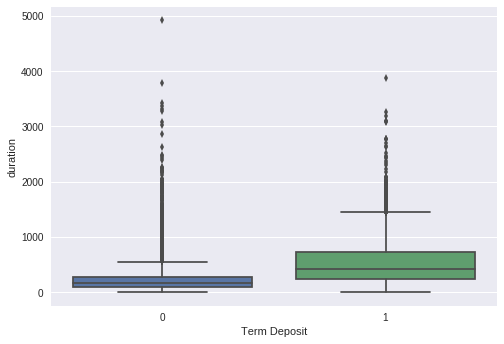

In [0]:
sns.boxplot('Term Deposit','duration',data=call)

# PCA on Customers Who Subscribed TD After Sales Call

In [0]:
call_new = call.drop(['job','marital','education','contact','poutcome','Term deposit?'],axis=1)

In [0]:
call_new2 = call_new.loc[call_new['Term Deposit']==1]

In [0]:
from sklearn.preprocessing import StandardScaler
call_new2 = call_new2.drop(['previous','pdays','Term Deposit','month','day','campaign','job_n','contact_n'],axis=1)
scaled_df = StandardScaler().fit_transform(call_new2)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
call_new2.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'marital_n',
       'education_n', 'poutcome_n'],
      dtype='object')

In [0]:
pd.DataFrame(scaled_df).head()

,0,1,2,3,4,5,6,7,8
0,1.284031,-0.099646,0.153889,1.316561,-0.317377,1.285913,0.908045,-0.211185,-0.667422
1,1.061751,-0.099646,-0.502537,-0.759555,-0.317377,2.368748,0.908045,-0.211185,-0.667422
2,-0.049648,-0.099646,-0.152614,1.316561,-0.317377,2.170016,0.908045,-0.211185,-0.667422
3,0.987658,-0.099646,0.191881,1.316561,-0.317377,0.106259,0.908045,-0.211185,-0.667422
4,0.913565,-0.099646,-0.462831,-0.759555,-0.317377,0.345757,0.908045,1.028502,-0.667422


In [0]:
features = scaled_df.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00018911 -0.02340939  0.12225084 -0.16524635 -0.05298378 -0.02800074
   0.47509215 -0.20928629  0.05976003]
 [-0.02340939  1.00018911 -0.05311731  0.03969448  0.06807765  0.03356131
  -0.01923001 -0.02104776 -0.05515034]
 [ 0.12225084 -0.05311731  1.00018911 -0.07516163 -0.08347895 -0.03668428
   0.0323677   0.02431224  0.04168887]
 [-0.16524635  0.03969448 -0.07516163  1.00018911  0.11972524  0.23880843
   0.01000263 -0.02853796 -0.08754109]
 [-0.05298378  0.06807765 -0.08347895  0.11972524  1.00018911  0.13106352
   0.03248815 -0.01581502 -0.0862686 ]
 [-0.02800074  0.03356131 -0.03668428  0.23880843  0.13106352  1.00018911
   0.02415211 -0.06356695 -0.25313825]
 [ 0.47509215 -0.01923001  0.0323677   0.01000263  0.03248815  0.02415211
   1.00018911 -0.13361139  0.03011646]
 [-0.20928629 -0.02104776  0.02431224 -0.02853796 -0.01581502 -0.06356695
  -0.13361139  1.00018911  0.03978978]
 [ 0.05976003 -0.05515034  0.04168887 -0.08754109 -0.0862686  -0.25313825
   0.03011646  0.03978

In [0]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
#Show the eigenvectors
print("Eigenvectors \n%s" %eig_vecs)

Eigenvectors 
[[-0.59328861  0.30470839 -0.72199215 -0.06574288 -0.01049964 -0.12545908
  -0.08939637  0.05168034  0.05526162]
 [ 0.12634227  0.13833526  0.01971907 -0.04736225 -0.56992208 -0.1425314
   0.30384967  0.6949201   0.20470469]
 [-0.23426025 -0.09994831  0.09670908  0.08590479  0.59777934  0.37411602
   0.27244594  0.38121414  0.44893902]
 [ 0.34181808  0.32905685 -0.24515287  0.40168561  0.09784218 -0.14416833
   0.6137734  -0.35384825  0.14541927]
 [ 0.21443496  0.31312291 -0.05709078  0.02012331 -0.28072994  0.5275539
  -0.40071494 -0.20453689  0.54108887]
 [ 0.27678165  0.49017351  0.06252275 -0.73729862  0.33917404 -0.13273173
   0.03241977  0.04108714 -0.01440704]
 [-0.47161409  0.4098711   0.61617566  0.16633238 -0.06110934 -0.34610875
  -0.04126774 -0.16973571  0.21956337]
 [ 0.20856329 -0.37054495 -0.1449469  -0.03136344  0.13805819 -0.61116365
  -0.27110947 -0.02511201  0.57488476]
 [-0.26799228 -0.35515374  0.03217801 -0.50203526 -0.30252703  0.11812878
   0.46033

[0.18430818 0.16612757 0.115087   0.10768096 0.10409909 0.09901122
 0.09411485 0.07664365]


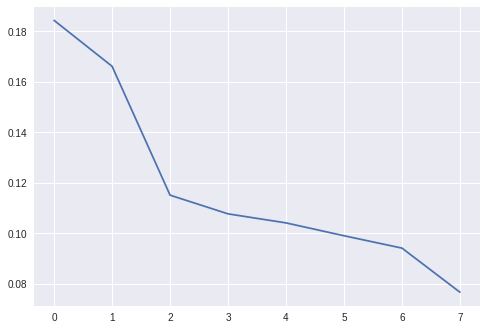

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
pca.fit(scaled_df)
plt.plot(pca.explained_variance_ratio_[:10])
print(pca.explained_variance_ratio_)

In [0]:
components = pd.DataFrame(pca.components_[:4], columns = call_new2.columns)
component_1 = components.iloc[0,:]
component_1[abs(component_1)>0.3]

age          0.593289
housing     -0.341818
marital_n    0.471614
Name: 0, dtype: float64

In [0]:
component_2 = components.iloc[1,:]
component_2[abs(component_2)>0.3]

age            0.304708
housing        0.329057
loan           0.313123
duration       0.490174
marital_n      0.409871
education_n   -0.370545
poutcome_n    -0.355154
Name: 1, dtype: float64

In [0]:
component_3 = components.iloc[2,:]
component_3[abs(component_3)>0.3]

default      -0.569922
balance       0.597779
duration      0.339174
poutcome_n   -0.302527
Name: 2, dtype: float64

# Prediction Model

In [0]:
len(call)

45211

In [0]:
from sklearn.model_selection import train_test_split

predictors = call_new.drop(['Term Deposit'], axis=1)
target = call_new["Term Deposit"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

84.92


In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


89.65


In [0]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

87.07


In [0]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


89.88


In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

87.74


# Conclusion

**1. Customer Features (Who Subscribed TD After the Call)**
    - Elder Group
    - Married Group
    - Longer Relationship
    - High Balance
    - No Default History
    
**2. Recommended Prediction Model**
    - Random Forest: 89.88% accuracy
    - Logistic Regression: 89.65% accuracy
    
**3. Suggestions on Improve Call Efficiency**
    - Organized theme campaign for customer with features listed above
    - Improve sales script for specifc groups
    - Expand the database, if its the bank's current client then include the transaction history

**4. Problem/Next Step**
    - How to deal with a data set with lots of categorical data
    - How to apply the model to potential customers